In [1]:
import pandas as pd
import numpy as np # For np.number later, good to import

# --- Define paths to your saved, processed, and versioned data ---
version_to_load = "v1.0.0" # Make sure this matches the version you saved
data_directory = '/mnt/data_drive/kaggle/lending_club/processed_data/' # Adjust if your path is different

x_filename = f'X_processed_2018.{version_to_load}.parquet'
y_filename = f'y_target_2018.{version_to_load}.csv'

x_load_path = f'{data_directory}{x_filename}' # Using f-string for path concatenation
y_load_path = f'{data_directory}{y_filename}'

print(f"--- Loading Processed Data (Version: {version_to_load}) ---")
print(f"Attempting to load X from: {x_load_path}")
print(f"Attempting to load y from: {y_load_path}")

try:
    X = pd.read_parquet(x_load_path)
    y = pd.read_csv(y_load_path)['is_default'] # Assuming 'is_default' was the header for the single column in y's CSV

    print("\nData loaded successfully!")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")

    print("\nFirst 5 rows of loaded X:")
    print(X.head())
    print("\nFirst 5 values of loaded y:")
    print(y.head())

    print("\nData types in loaded X (checking for non-numeric):")
    # All columns in X should be numeric (int, float, or bool which is treated as numeric)
    non_numeric_cols_in_X = X.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric_cols_in_X) == 0:
        print("All feature columns in X are numeric. Good!")
    else:
        print(f"Warning: Non-numeric columns found in loaded X: {non_numeric_cols_in_X.tolist()}")
        print(X[non_numeric_cols_in_X].info())
        print("Ensure these are expected (e.g., boolean columns are fine).")

except FileNotFoundError:
    print(f"ERROR: One or both files not found. Please check paths:")
    print(f"X path: {x_load_path}")
    print(f"y path: {y_load_path}")
    # Stop execution or handle error appropriately
    X = pd.DataFrame()
    y = pd.Series(dtype='int')
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    X = pd.DataFrame()
    y = pd.Series(dtype='int')

--- Loading Processed Data (Version: v1.0.0) ---
Attempting to load X from: /mnt/data_drive/kaggle/lending_club/processed_data/X_processed_2018.v1.0.0.parquet
Attempting to load y from: /mnt/data_drive/kaggle/lending_club/processed_data/y_target_2018.v1.0.0.csv

Data loaded successfully!
Shape of X: (63539, 135)
Shape of y: (63539,)

First 5 rows of loaded X:
   loan_amnt  installment  annual_inc    dti  delinq_2yrs  fico_range_low  \
0     3000.0        93.10     52000.0   0.58          0.0           760.0   
1     5000.0       166.03     55000.0  14.18          0.0           675.0   
2     7000.0       232.44     40000.0  20.25          0.0           695.0   
3    20300.0       509.66     55000.0  26.63          0.0           705.0   
4    30000.0      1143.39     57000.0  27.58          0.0           680.0   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  open_acc  ...  \
0            764.0             0.0                    26.0       7.0  ...   
1            679.0   

In [2]:
from sklearn.model_selection import train_test_split

if not X.empty and not y.empty:
    print("\n--- Splitting Loaded Data into Training and Testing Sets ---")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Data splitting complete.")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    print("\nProportion of target class in y_train:")
    print(y_train.value_counts(normalize=True))
    print("\nProportion of target class in y_test:")
    print(y_test.value_counts(normalize=True))
else:
    print("X or y is empty after loading. Cannot proceed with train-test split.")


--- Splitting Loaded Data into Training and Testing Sets ---
Data splitting complete.
X_train shape: (50831, 135)
X_test shape: (12708, 135)
y_train shape: (50831,)
y_test shape: (12708,)

Proportion of target class in y_train:
is_default
0    0.74669
1    0.25331
Name: proportion, dtype: float64

Proportion of target class in y_test:
is_default
0    0.746695
1    0.253305
Name: proportion, dtype: float64



--- Starting: Train and Evaluate XGBoost Classifier (on loaded data) ---
Calculated scale_pos_weight: 2.95

Training XGBoost model...


/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:45:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.

--- XGBoost Model Evaluation ---
Making predictions on the test set...

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      9489
           1       0.41      0.69      0.51      3219

    accuracy                           0.67     12708
   macro avg       0.64      0.68      0.63     12708
weighted avg       0.75      0.67      0.69     12708


Confusion Matrix (XGBoost):
[[6290 3199]
 [ 995 2224]]


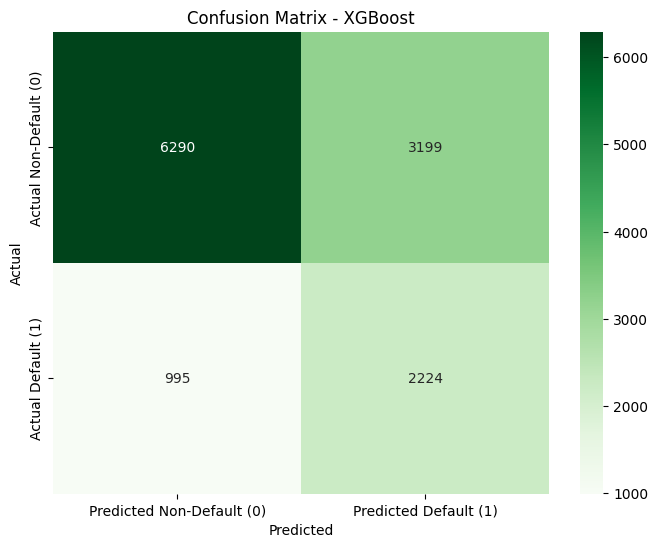


ROC AUC Score (XGBoost): 0.7427


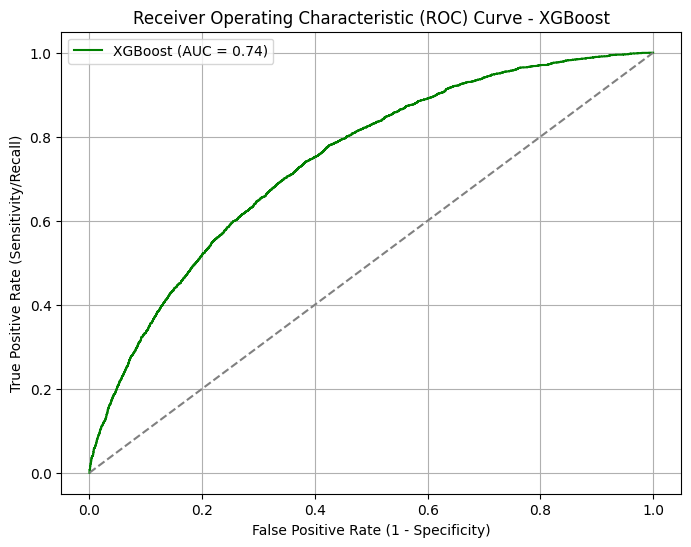


--- XGBoost Feature Importances ---


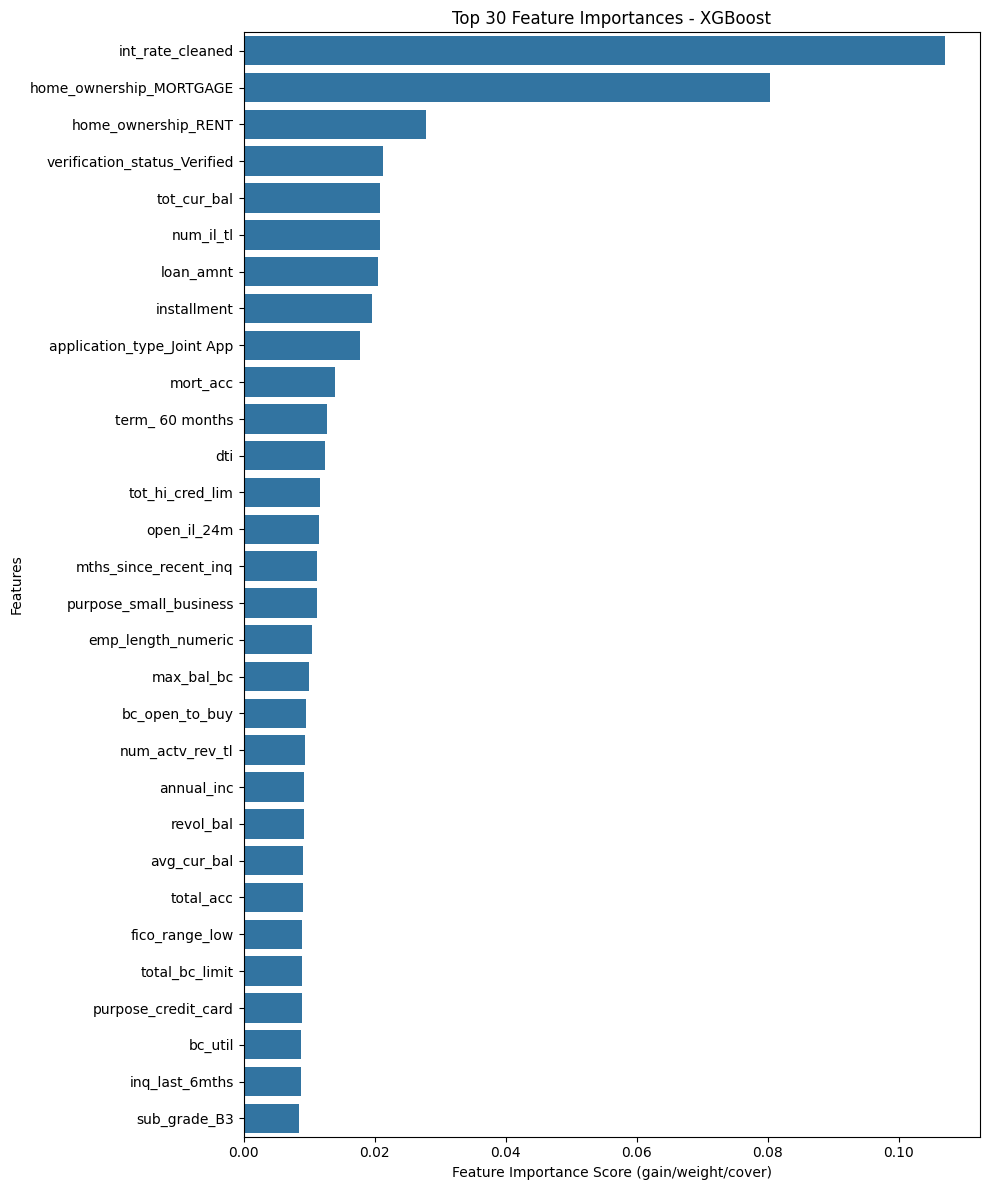


Top 30 features (XGBoost):
int_rate_cleaned                0.107040
home_ownership_MORTGAGE         0.080299
home_ownership_RENT             0.027851
verification_status_Verified    0.021241
tot_cur_bal                     0.020882
num_il_tl                       0.020875
loan_amnt                       0.020565
installment                     0.019568
application_type_Joint App      0.017779
mort_acc                        0.013992
term_ 60 months                 0.012759
dti                             0.012489
tot_hi_cred_lim                 0.011686
open_il_24m                     0.011474
mths_since_recent_inq           0.011262
purpose_small_business          0.011183
emp_length_numeric              0.010375
max_bal_bc                      0.009935
bc_open_to_buy                  0.009473
num_actv_rev_tl                 0.009457
annual_inc                      0.009261
revol_bal                       0.009228
avg_cur_bal                     0.009051
total_acc                    

In [3]:
# --- Step 1: Install XGBoost (if you haven't already in this new environment/notebook session) ---
# You might want to run this in a separate cell first, or ensure your Conda env has it.
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
# pandas and numpy should be imported from Cell 1

# Ensure X_train, X_test, y_train, y_test exist from the previous cell
if 'X_train' in locals() and 'y_train' in locals() and \
   'X_test' in locals() and 'y_test' in locals() and \
   not X_train.empty and not y_train.empty:

    print("\n--- Starting: Train and Evaluate XGBoost Classifier (on loaded data) ---")

    # --- Calculate scale_pos_weight for handling imbalance ---
    count_negative_class = y_train.value_counts()[0] # Assuming 0 is non-default
    count_positive_class = y_train.value_counts()[1] # Assuming 1 is default
    
    if count_positive_class > 0 :
        scale_pos_weight_value = count_negative_class / count_positive_class
        print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")
    else:
        print("Positive class count is zero, cannot calculate scale_pos_weight. Using default (1).")
        scale_pos_weight_value = 1

    # --- Initialize and Train the XGBoost Classifier ---
    model_xgb = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        scale_pos_weight=scale_pos_weight_value,
        use_label_encoder=False, 
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )

    print("\nTraining XGBoost model...")
    model_xgb.fit(X_train, y_train)
    print("Model training complete.")

    # --- Evaluate the XGBoost Model ---
    print("\n--- XGBoost Model Evaluation ---")
    print("Making predictions on the test set...")
    y_pred_xgb = model_xgb.predict(X_test)
    y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

    print("\nClassification Report (XGBoost):")
    print(classification_report(y_test, y_pred_xgb))

    print("\nConfusion Matrix (XGBoost):")
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    print(cm_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Predicted Non-Default (0)', 'Predicted Default (1)'], 
                yticklabels=['Actual Non-Default (0)', 'Actual Default (1)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix - XGBoost')
    plt.show()

    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    print(f"\nROC AUC Score (XGBoost): {roc_auc_xgb:.4f}")

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb) # Use _ for thresholds if not used
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_xgb, tpr_xgb, color='green', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Feature Importances (XGBoost) ---
    print("\n--- XGBoost Feature Importances ---")
    importances_xgb = model_xgb.feature_importances_
    feature_names = X_train.columns
    xgb_importances = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10, 12)) 
    top_n_features = 30 
    sns.barplot(x=xgb_importances[:top_n_features], y=xgb_importances.index[:top_n_features])
    plt.title(f"Top {top_n_features} Feature Importances - XGBoost")
    plt.xlabel("Feature Importance Score (gain/weight/cover)")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

    print(f"\nTop {top_n_features} features (XGBoost):")
    print(xgb_importances.head(top_n_features))

else:
    print("ERROR: Training/testing data (X_train, y_train, X_test, y_test) not found or is empty. Please ensure Cell 1 (loading data) and Cell 2 (train-test split) ran correctly.")

In [4]:
import xgboost as xgb # Ensure xgboost is imported
import os # Ensure os is imported for path operations
import pandas as pd # Ensure pandas is imported (though not directly used for saving model here)

# Ensure model_xgb exists from the previous cell and X (for feature names)
if 'model_xgb' in locals() and 'X' in locals() and not X.empty:
    print("--- Starting: Save Trained XGBoost Model (Versioned) ---")

    # Define your model version and output directory
    model_version_tag = "v1.0.0" # Align with your data version or create a specific model version
    model_output_directory = '/mnt/data_drive/kaggle/lending_club/trained_models/' # Adjust as needed
    
    # Create the output directory if it doesn't exist
    os.makedirs(model_output_directory, exist_ok=True)

    # Construct the filename for the model
    model_filename = f'xgb_loan_model_2018.{model_version_tag}.json' # XGBoost native JSON format
    # Alternatively, for binary format:
    # model_filename = f'xgb_loan_model_2018.{model_version_tag}.ubj' # XGBoost native UBJ format
    # Or if using joblib:
    # model_filename = f'xgb_loan_model_2018.{model_version_tag}.joblib'

    model_filepath = os.path.join(model_output_directory, model_filename)

    try:
        # Save the XGBoost model using its native save_model method
        model_xgb.save_model(model_filepath)
        print(f"Trained XGBoost model successfully saved to: {model_filepath}")

        # (Optional) Save the feature names used for training, as XGBoost native format
        # doesn't always store them in a way that's easily retrieved without the original data.
        # This is good practice for ensuring consistency when loading the model later.
        feature_names_filename = f'xgb_loan_model_2018_features.{model_version_tag}.txt'
        feature_names_filepath = os.path.join(model_output_directory, feature_names_filename)
        with open(feature_names_filepath, 'w') as f:
            for feature in X.columns: # Assuming X (features DataFrame) is still in scope from data loading/splitting
                f.write(f"{feature}\n")
        print(f"Feature names saved to: {feature_names_filepath}")

    except Exception as e:
        print(f"Error saving XGBoost model or features: {e}")

else:
    print("ERROR: Trained XGBoost model (model_xgb) or feature DataFrame X not found or X is empty. Please ensure the model training cell ran correctly.")

# --- Example of how to load the model later (in a new session/notebook) ---
# print("\n--- Example: How to Load the XGBoost Model ---")
# loaded_model_xgb = xgb.XGBClassifier()
# loaded_model_filepath = '/mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018.v1.0.0.json' # Adjust path
# try:
#     loaded_model_xgb.load_model(loaded_model_filepath)
#     print(f"XGBoost model successfully loaded from: {loaded_model_filepath}")
#
#     # If you saved feature names, you might want to load them too
#     # loaded_feature_names_filepath = '/mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018_features.v1.0.0.txt'
#     # loaded_features = []
#     # with open(loaded_feature_names_filepath, 'r') as f:
#     #     for line in f:
#     #         loaded_features.append(line.strip())
#     # print(f"Loaded {len(loaded_features)} feature names.")
#     # Now, when making predictions, ensure your input data has these features in the same order.
#
# except Exception as e:
#     print(f"Error loading XGBoost model: {e}")
#
# # Example prediction with loaded model (assuming you have new data 'X_new_data' with correct features)
# # if 'X_new_data' in locals() and 'loaded_model_xgb' in locals():
# # Ensure X_new_data has columns in the same order as 'loaded_features' if you use that list
# # predictions = loaded_model_xgb.predict(X_new_data)
# # print("Made predictions with loaded model.")

--- Starting: Save Trained XGBoost Model (Versioned) ---
Trained XGBoost model successfully saved to: /mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018.v1.0.0.json
Feature names saved to: /mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018_features.v1.0.0.txt


In [5]:
import pandas as pd # Ensure pandas is imported

# Assuming X_train is in scope from your last model training run
# If not, and you loaded X and y from files, make sure X is your full feature DataFrame
# before the train-test split for this check.
# For consistency, let's check X_train as that's what the model was trained on.

if 'X_train' in locals() and not X_train.empty:
    print("--- Checking 'revol_bal' and 'revol_util_cleaned' in X_train ---")
    
    columns_to_check = []
    if 'revol_bal' in X_train.columns:
        columns_to_check.append('revol_bal')
    if 'revol_util_cleaned' in X_train.columns:
        columns_to_check.append('revol_util_cleaned')
    
    if columns_to_check:
        print("\nData types and sample values:")
        for col in columns_to_check:
            print(f"\nColumn: {col}")
            print(f"Dtype: {X_train[col].dtype}")
            print("Sample values:")
            print(X_train[col].head())
            print(f"Number of NaNs: {X_train[col].isnull().sum()}")
            
        if 'revol_bal' in columns_to_check and 'revol_util_cleaned' in columns_to_check:
            print("\nBoth 'revol_bal' and 'revol_util_cleaned' are present.")
            print("Review their dtypes and sample values to decide which to keep.")
            print("'revol_bal' is typically a raw balance amount (numeric).")
            print("'revol_util_cleaned' should be the cleaned utilization rate (numeric, e.g., 30.5 for 30.5%).")
        elif 'revol_bal' in columns_to_check:
            print("\nOnly 'revol_bal' is present.")
            print("Ensure this is the feature you intend to use for revolving credit information.")
        elif 'revol_util_cleaned' in columns_to_check:
            print("\nOnly 'revol_util_cleaned' is present.")
            print("This is likely the intended cleaned feature for revolving utilization.")
            
    else:
        print("\nNeither 'revol_bal' nor 'revol_util_cleaned' found in X_train.columns.")
        print("Please check your feature list.")

else:
    print("ERROR: DataFrame X_train not found or is empty. Please ensure model training steps ran correctly.")

--- Checking 'revol_bal' and 'revol_util_cleaned' in X_train ---

Data types and sample values:

Column: revol_bal
Dtype: float64
Sample values:
30213    10325.0
39196     7652.0
55033    16073.0
55265     5315.0
51978    12312.0
Name: revol_bal, dtype: float64
Number of NaNs: 0

Column: revol_util_cleaned
Dtype: float64
Sample values:
30213    26.5
39196    17.3
55033    47.0
55265    10.3
51978    53.5
Name: revol_util_cleaned, dtype: float64
Number of NaNs: 0

Both 'revol_bal' and 'revol_util_cleaned' are present.
Review their dtypes and sample values to decide which to keep.
'revol_bal' is typically a raw balance amount (numeric).
'revol_util_cleaned' should be the cleaned utilization rate (numeric, e.g., 30.5 for 30.5%).


--- Starting: Re-run Full Pipeline with Final Cleaned X ---

1. Splitting data into Training and Testing sets...
Data splitting complete.
X_train shape: (50831, 135)
X_test shape: (12708, 135)
y_train shape: (50831,)
y_test shape: (12708,)

Proportion of target class in y_train:
is_default
0    0.74669
1    0.25331
Name: proportion, dtype: float64

Proportion of target class in y_test:
is_default
0    0.746695
1    0.253305
Name: proportion, dtype: float64

2. Training XGBoostClassifier model...
Calculated scale_pos_weight: 2.95


/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:53:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model training complete.

--- XGBoost Model Evaluation ---
Making predictions on the test set...

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      9489
           1       0.41      0.69      0.51      3219

    accuracy                           0.67     12708
   macro avg       0.64      0.68      0.63     12708
weighted avg       0.75      0.67      0.69     12708


Confusion Matrix (XGBoost):
[[6290 3199]
 [ 995 2224]]


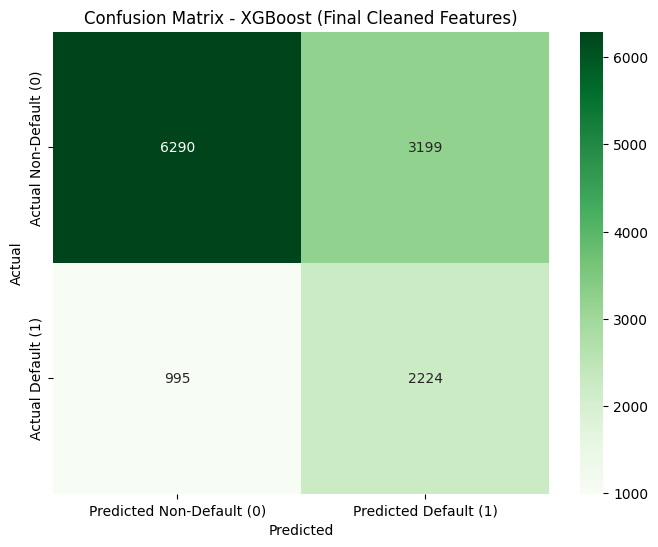


ROC AUC Score (XGBoost): 0.7427


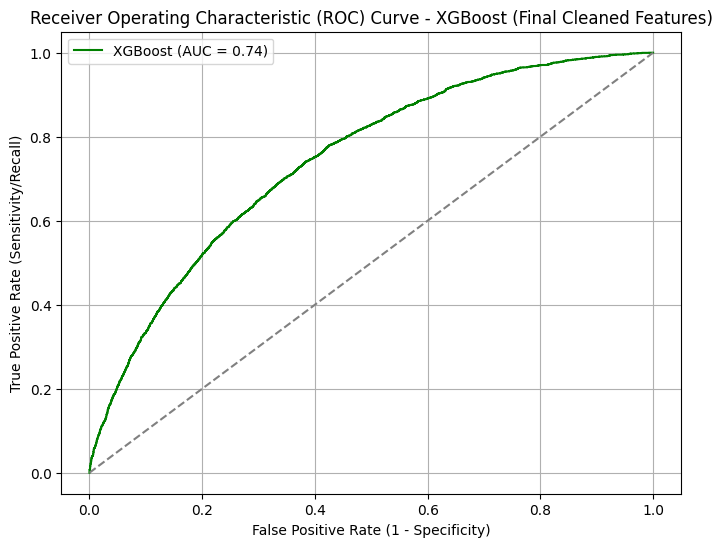


--- XGBoost Feature Importances (Final Cleaned Features) ---


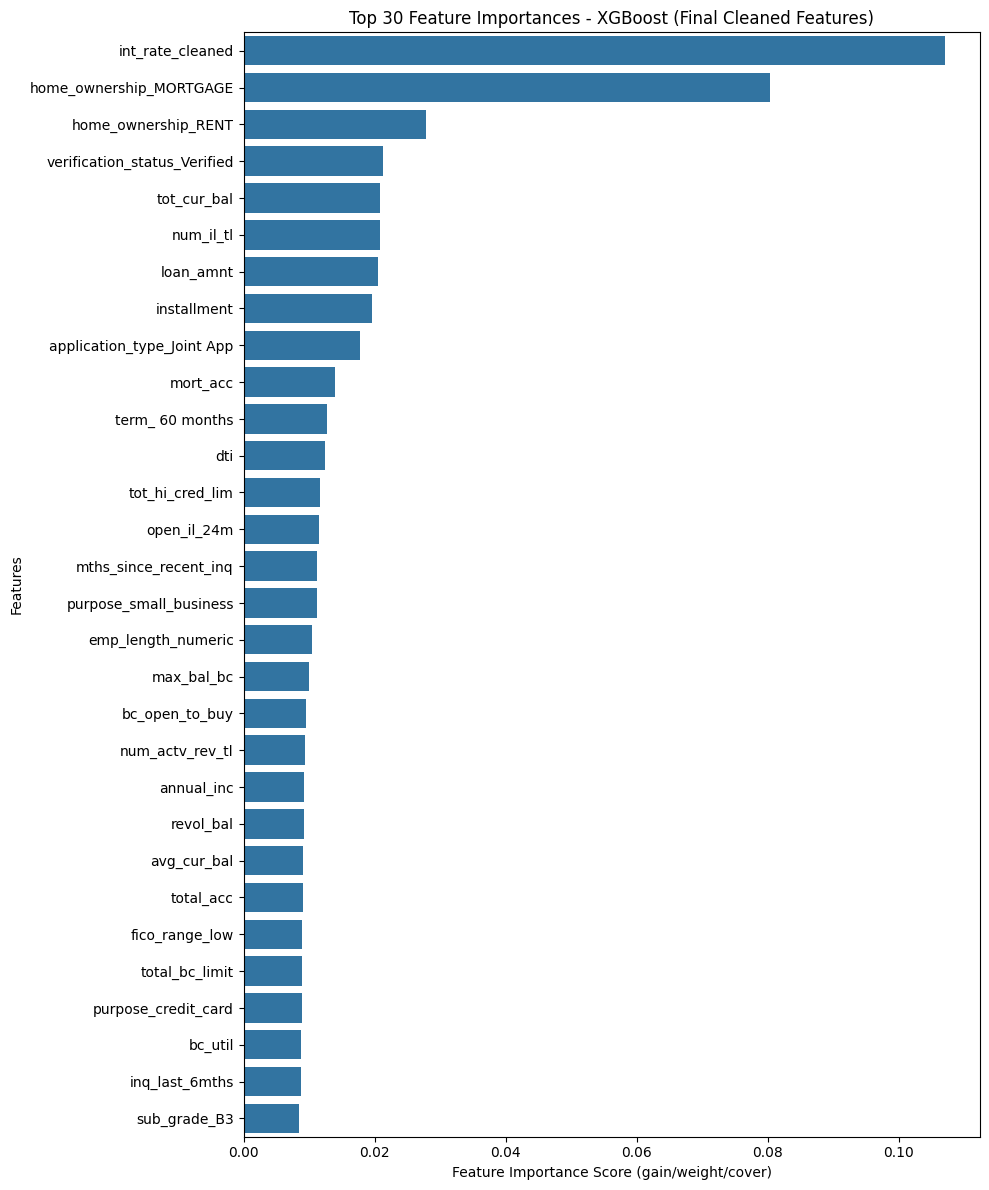


Top 30 features (XGBoost):
int_rate_cleaned                0.107040
home_ownership_MORTGAGE         0.080299
home_ownership_RENT             0.027851
verification_status_Verified    0.021241
tot_cur_bal                     0.020882
num_il_tl                       0.020875
loan_amnt                       0.020565
installment                     0.019568
application_type_Joint App      0.017779
mort_acc                        0.013992
term_ 60 months                 0.012759
dti                             0.012489
tot_hi_cred_lim                 0.011686
open_il_24m                     0.011474
mths_since_recent_inq           0.011262
purpose_small_business          0.011183
emp_length_numeric              0.010375
max_bal_bc                      0.009935
bc_open_to_buy                  0.009473
num_actv_rev_tl                 0.009457
annual_inc                      0.009261
revol_bal                       0.009228
avg_cur_bal                     0.009051
total_acc                    

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Keep for comparison if you uncomment that part
import xgboost as xgb # Import XGBoost
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported

# Ensure X and y exist from the previous cell (your fully cleaned versions)
if 'X' in locals() and 'y' in locals() and not X.empty and not y.empty:
    print("--- Starting: Re-run Full Pipeline with Final Cleaned X ---")

    # 1. Re-run Train-Test Split
    print("\n1. Splitting data into Training and Testing sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Data splitting complete.")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    print("\nProportion of target class in y_train:")
    print(y_train.value_counts(normalize=True))
    print("\nProportion of target class in y_test:")
    print(y_test.value_counts(normalize=True))

    # 2. Train XGBoost Classifier Model
    print("\n2. Training XGBoostClassifier model...")
    
    # Calculate scale_pos_weight for handling imbalance
    count_negative_class = y_train.value_counts().get(0, 0) # Get count for class 0, default to 0 if not present
    count_positive_class = y_train.value_counts().get(1, 0) # Get count for class 1, default to 0 if not present
    
    if count_positive_class > 0 and count_negative_class > 0 : # Ensure both classes are present
        scale_pos_weight_value = count_negative_class / count_positive_class
        print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")
    else:
        print("Warning: One or both classes are missing in y_train. Cannot calculate scale_pos_weight accurately. Using default (1).")
        scale_pos_weight_value = 1
        if count_positive_class == 0 :
             print("Warning: Positive class (1) has zero samples in y_train!")
        if count_negative_class == 0 :
             print("Warning: Negative class (0) has zero samples in y_train!")


    model_xgb = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        scale_pos_weight=scale_pos_weight_value,
        use_label_encoder=False,  # Suppress warning with XGBoost >= 1.3.0 (deprecated in >1.7.0)
                                  # For XGBoost >1.7.0, label encoding should be done manually if needed,
                                  # but for 0/1 integer targets, it's usually fine.
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1                 # Use all available cores
    )
    
    model_xgb.fit(X_train, y_train)
    print("XGBoost model training complete.")

    # 3. Evaluate the XGBoost Model
    print("\n--- XGBoost Model Evaluation ---")
    print("Making predictions on the test set...")
    y_pred_xgb = model_xgb.predict(X_test)
    y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1] # Probabilities for the positive class

    print("\nClassification Report (XGBoost):")
    print(classification_report(y_test, y_pred_xgb))

    print("\nConfusion Matrix (XGBoost):")
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    print(cm_xgb)
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Predicted Non-Default (0)', 'Predicted Default (1)'], 
                yticklabels=['Actual Non-Default (0)', 'Actual Default (1)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix - XGBoost (Final Cleaned Features)')
    plt.show()

    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    print(f"\nROC AUC Score (XGBoost): {roc_auc_xgb:.4f}")

    # Plot ROC Curve
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb) # Use _ for thresholds if not used
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_xgb, tpr_xgb, color='green', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--') # Diagonal 50% line
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (Final Cleaned Features)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 4. Display Feature Importances (XGBoost)
    print("\n--- XGBoost Feature Importances (Final Cleaned Features) ---")
    importances_xgb = model_xgb.feature_importances_
    feature_names = X_train.columns # X_train.columns will have the correct feature names post-split
    xgb_importances = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10, 12)) 
    top_n_features = 30 # You can adjust how many top features to plot
    sns.barplot(x=xgb_importances[:top_n_features], y=xgb_importances.index[:top_n_features])
    plt.title(f"Top {top_n_features} Feature Importances - XGBoost (Final Cleaned Features)")
    plt.xlabel("Feature Importance Score (gain/weight/cover)") # XGBoost importance types
    plt.ylabel("Features")
    plt.tight_layout() # Adjust layout to make sure labels fit
    plt.show()

    print(f"\nTop {top_n_features} features (XGBoost):")
    print(xgb_importances.head(top_n_features))

else:
    print("ERROR: DataFrame X and/or Series y not found or are empty. Please ensure X is your fully cleaned feature set and y is your target variable from the previous cell.")

In [7]:
# Ensure XGBoost is imported, and X_train, X_test, y_train, y_test are available
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if 'X_train' in locals() and 'y_train' in locals() and \
   'X_test' in locals() and 'y_test' in locals() and \
   not X_train.empty and not y_train.empty:

    print("--- Re-evaluating XGBoost Model (Text First) ---")

    # --- Calculate scale_pos_weight for handling imbalance ---
    count_negative_class = y_train.value_counts().get(0, 0)
    count_positive_class = y_train.value_counts().get(1, 0)
    
    if count_positive_class > 0 and count_negative_class > 0:
        scale_pos_weight_value = count_negative_class / count_positive_class
        print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")
    else:
        print("Warning: One or both classes are missing in y_train. Using default scale_pos_weight (1).")
        scale_pos_weight_value = 1
    
    # --- Initialize and Train the XGBoost Classifier (if not already trained in this session) ---
    # If model_xgb is already trained from a previous cell in this session, you can skip re-fitting
    # For a clean run, we'll re-fit here.
    print("\nTraining XGBoost model (or re-confirming training)...")
    model_xgb = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        scale_pos_weight=scale_pos_weight_value,
        use_label_encoder=False, 
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
    model_xgb.fit(X_train, y_train)
    print("Model training complete.")

    # --- Evaluate the XGBoost Model ---
    print("\n--- XGBoost Model Evaluation (Text Output) ---")
    print("Making predictions on the test set...")
    y_pred_xgb = model_xgb.predict(X_test)
    y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

    print("\nClassification Report (XGBoost):")
    print(classification_report(y_test, y_pred_xgb))

    print("\nConfusion Matrix (XGBoost):")
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    print(cm_xgb)
    # For a compact view of CM components:
    tn, fp, fn, tp = cm_xgb.ravel()
    print(f"True Negatives: {tn}, False Positives: {fp}")
    print(f"False Negatives: {fn}, True Positives: {tp}")

    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    print(f"\nROC AUC Score (XGBoost): {roc_auc_xgb:.4f}")

    # --- Feature Importances (XGBoost - Text Output) ---
    print("\n--- XGBoost Feature Importances (Top 30) ---")
    importances_xgb = model_xgb.feature_importances_
    feature_names = X_train.columns
    xgb_importances = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)
    print(xgb_importances.head(30))

    # --- Optional: Plotting ---
    # Uncomment the sections below if you want to generate the plots

    # print("\n--- Optional: Generating Plots ---")
    # # Plotting the confusion matrix
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', 
    #             xticklabels=['Predicted Non-Default (0)', 'Predicted Default (1)'], 
    #             yticklabels=['Actual Non-Default (0)', 'Actual Default (1)'])
    # plt.ylabel('Actual')
    # plt.xlabel('Predicted')
    # plt.title('Confusion Matrix - XGBoost')
    # plt.show()

    # # Plot ROC Curve
    # fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
    # plt.figure(figsize=(8, 6))
    # plt.plot(fpr_xgb, tpr_xgb, color='green', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
    # plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    # plt.xlabel('False Positive Rate (1 - Specificity)')
    # plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    # plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # # Plot Feature Importances
    # plt.figure(figsize=(10, 12)) 
    # top_n_features = 30 
    # sns.barplot(x=xgb_importances[:top_n_features], y=xgb_importances.index[:top_n_features])
    # plt.title(f"Top {top_n_features} Feature Importances - XGBoost")
    # plt.xlabel("Feature Importance Score")
    # plt.ylabel("Features")
    # plt.tight_layout()
    # plt.show()

else:
    print("ERROR: Training/testing data (X_train, y_train, X_test, y_test) not found or is empty. Please ensure previous steps ran correctly.")

--- Re-evaluating XGBoost Model (Text First) ---
Calculated scale_pos_weight: 2.95

Training XGBoost model (or re-confirming training)...


/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:56:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.

--- XGBoost Model Evaluation (Text Output) ---
Making predictions on the test set...

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      9489
           1       0.41      0.69      0.51      3219

    accuracy                           0.67     12708
   macro avg       0.64      0.68      0.63     12708
weighted avg       0.75      0.67      0.69     12708


Confusion Matrix (XGBoost):
[[6290 3199]
 [ 995 2224]]
True Negatives: 6290, False Positives: 3199
False Negatives: 995, True Positives: 2224

ROC AUC Score (XGBoost): 0.7427

--- XGBoost Feature Importances (Top 30) ---
int_rate_cleaned                0.107040
home_ownership_MORTGAGE         0.080299
home_ownership_RENT             0.027851
verification_status_Verified    0.021241
tot_cur_bal                     0.020882
num_il_tl                       0.020875
loan_amnt                       0.020565
installment        

In [8]:
# Ensure XGBoost is imported, and X_train, X_test, y_train, y_test are available
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

if 'X_train' in locals() and 'y_train' in locals() and \
   'X_test' in locals() and 'y_test' in locals() and \
   not X_train.empty and not y_train.empty:

    print("--- Re-evaluating XGBoost Model (Text-Only Output) ---")

    # --- Calculate scale_pos_weight for handling imbalance ---
    count_negative_class = y_train.value_counts().get(0, 0)
    count_positive_class = y_train.value_counts().get(1, 0)
    
    if count_positive_class > 0 and count_negative_class > 0:
        scale_pos_weight_value = count_negative_class / count_positive_class
        print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")
    else:
        print("Warning: One or both classes are missing in y_train. Using default scale_pos_weight (1).")
        scale_pos_weight_value = 1
        
    # --- Initialize and Train the XGBoost Classifier (if not already trained) ---
    print("\nTraining XGBoost model (or re-confirming training)...")
    model_xgb = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        scale_pos_weight=scale_pos_weight_value,
        use_label_encoder=False, 
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
    model_xgb.fit(X_train, y_train)
    print("Model training complete.")

    # --- Evaluate the XGBoost Model ---
    print("\n--- XGBoost Model Evaluation (Text Output) ---")
    print("Making predictions on the test set...")
    y_pred_xgb = model_xgb.predict(X_test)
    y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

    print("\nClassification Report (XGBoost):")
    print(classification_report(y_test, y_pred_xgb))

    print("\nConfusion Matrix (XGBoost):")
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    print(cm_xgb)
    # For a compact view of CM components:
    tn, fp, fn, tp = cm_xgb.ravel()
    print(f"True Negatives: {tn}, False Positives: {fp}")
    print(f"False Negatives: {fn}, True Positives: {tp}")
    
    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    print(f"\nROC AUC Score (XGBoost): {roc_auc_xgb:.4f}")

    # --- Feature Importances (XGBoost - Text Output) ---
    print("\n--- XGBoost Feature Importances (Top 30) ---")
    importances_xgb = model_xgb.feature_importances_
    feature_names = X_train.columns
    xgb_importances = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)
    print(xgb_importances.head(30))

else:
    print("ERROR: Training/testing data (X_train, y_train, X_test, y_test) not found or is empty. Please ensure previous steps ran correctly.")

--- Re-evaluating XGBoost Model (Text-Only Output) ---
Calculated scale_pos_weight: 2.95

Training XGBoost model (or re-confirming training)...


/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:56:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.

--- XGBoost Model Evaluation (Text Output) ---
Making predictions on the test set...

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      9489
           1       0.41      0.69      0.51      3219

    accuracy                           0.67     12708
   macro avg       0.64      0.68      0.63     12708
weighted avg       0.75      0.67      0.69     12708


Confusion Matrix (XGBoost):
[[6290 3199]
 [ 995 2224]]
True Negatives: 6290, False Positives: 3199
False Negatives: 995, True Positives: 2224

ROC AUC Score (XGBoost): 0.7427

--- XGBoost Feature Importances (Top 30) ---
int_rate_cleaned                0.107040
home_ownership_MORTGAGE         0.080299
home_ownership_RENT             0.027851
verification_status_Verified    0.021241
tot_cur_bal                     0.020882
num_il_tl                       0.020875
loan_amnt                       0.020565
installment        

In [9]:
import xgboost as xgb # Ensure xgboost is imported
import os # Ensure os is imported for path operations
import pandas as pd # Ensure pandas is imported (for X.columns)

# Ensure model_xgb exists from the previous cell and X (for feature names)
if 'model_xgb' in locals() and 'X' in locals() and not X.empty:
    print("--- Starting: Save Current Trained XGBoost Model (Versioned) ---")

    # Define your model version and output directory
    model_version_tag = "v1.1.0" # New version for this specific trained model
    model_output_directory = '/mnt/data_drive/kaggle/lending_club/trained_models/' # Adjust as needed
    
    # Create the output directory if it doesn't exist
    os.makedirs(model_output_directory, exist_ok=True)

    # Construct the filename for the model
    # Differentiating this model name slightly, e.g., by adding "baseline" or similar if needed,
    # or just using the version.
    model_filename = f'xgb_loan_model_2018_baseline.{model_version_tag}.json' # XGBoost native JSON format
    model_filepath = os.path.join(model_output_directory, model_filename)

    try:
        # Save the XGBoost model using its native save_model method
        model_xgb.save_model(model_filepath)
        print(f"Trained XGBoost model successfully saved to: {model_filepath}")

        # (Optional but Recommended) Save the feature names used for training
        feature_names_filename = f'xgb_loan_model_2018_baseline_features.{model_version_tag}.txt'
        feature_names_filepath = os.path.join(model_output_directory, feature_names_filename)
        # Use X_train.columns if available and reflects the columns used for training this model_xgb,
        # otherwise use X.columns if X was the DataFrame just before splitting.
        # If X_train is definitely what model_xgb was trained on:
        if 'X_train' in locals() and not X_train.empty:
            features_to_save = X_train.columns
        else:
            features_to_save = X.columns # Fallback

        with open(feature_names_filepath, 'w') as f:
            for feature in features_to_save:
                f.write(f"{feature}\n")
        print(f"Feature names used for training this model saved to: {feature_names_filepath}")

    except Exception as e:
        print(f"Error saving XGBoost model or features: {e}")

else:
    print("ERROR: Trained XGBoost model (model_xgb) or feature DataFrame X/X_train not found or X is empty. Please ensure the model training cell ran correctly.")

--- Starting: Save Current Trained XGBoost Model (Versioned) ---
Trained XGBoost model successfully saved to: /mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018_baseline.v1.1.0.json
Feature names used for training this model saved to: /mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018_baseline_features.v1.1.0.txt


In [10]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split # train_test_split for re-confirming data
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint # For specifying parameter distributions

# Ensure X_train, X_test, y_train, y_test exist and are correctly defined from your CLEANED X and y
if 'X_train' in locals() and 'y_train' in locals() and \
   'X_test' in locals() and 'y_test' in locals() and \
   not X_train.empty and not y_train.empty:

    print("--- Starting Step 13: Hyperparameter Tuning for XGBoost ---")

    # --- Define Parameter Grid for RandomizedSearchCV ---
    # For some parameters, a distribution (like uniform or randint) is better.
    # For others, a list of values is fine.
    param_dist = {
        'n_estimators': randint(100, 500),  # Number of trees
        'learning_rate': uniform(0.01, 0.2), # Learning rate, e.g., values between 0.01 and 0.21
        'max_depth': randint(3, 10),         # Max depth of a tree
        'subsample': uniform(0.7, 0.3),      # Subsample ratio of the training instance (0.7 to 1.0)
        'colsample_bytree': uniform(0.7, 0.3), # Subsample ratio of columns per tree (0.7 to 1.0)
        'gamma': uniform(0, 0.5),            # Minimum loss reduction required to make a further partition
        'min_child_weight': randint(1, 7),   # Minimum sum of instance weight needed in a child
        # scale_pos_weight is important for imbalance, let's keep it based on our calculation or try a small range
        # For simplicity in RandomizedSearch, we can fix it or include it if we have a good range in mind.
        # Let's re-calculate it here for clarity, or you can hardcode the value from your previous run.
    }

    # Re-calculate scale_pos_weight based on y_train
    count_negative_class_train = y_train.value_counts().get(0, 0)
    count_positive_class_train = y_train.value_counts().get(1, 0)
    if count_positive_class_train > 0 and count_negative_class_train > 0:
        current_scale_pos_weight = count_negative_class_train / count_positive_class_train
        print(f"Using scale_pos_weight around: {current_scale_pos_weight:.2f}")
        # You could add scale_pos_weight to param_dist if you want to tune it, e.g.:
        # 'scale_pos_weight': uniform(current_scale_pos_weight * 0.8, current_scale_pos_weight * 0.4) # e.g. 20% range around current
    else:
        print("Warning: Cannot accurately calculate scale_pos_weight for RandomizedSearchCV. Using 1.")
        current_scale_pos_weight = 1 # Default if classes are not present as expected

    # Initialize XGBoost Classifier with the fixed scale_pos_weight
    # The parameters defined in param_dist will be searched by RandomizedSearchCV
    xgb_model_for_tuning = xgb.XGBClassifier(
        scale_pos_weight=current_scale_pos_weight, # Set this based on your training data
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )

    # --- Setup RandomizedSearchCV ---
    # n_iter: Number of parameter settings that are sampled. n_iter trades off runtime vs quality of solution.
    # cv: Number of cross-validation folds.
    # scoring: Metric to optimize for. 'roc_auc' is good for imbalanced classes.
    # verbose: Controls the verbosity: the higher, the more messages.
    # random_state: For reproducibility of the search.
    n_iter_search = 20 # Number of iterations (parameter combinations to try). Increase for more thorough search.
    print(f"\nStarting RandomizedSearchCV with n_iter={n_iter_search}...")

    random_search = RandomizedSearchCV(
        xgb_model_for_tuning,
        param_distributions=param_dist,
        n_iter=n_iter_search,
        cv=3, # 3-fold cross-validation. Can increase to 5 if time allows.
        scoring='roc_auc', # Focus on ROC AUC for optimization
        verbose=1,
        random_state=42,
        n_jobs=-1 # Use all available cores for search
    )

    # Fit RandomizedSearchCV to the training data
    # This will take some time!
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV fitting complete.")

    # --- Get Best Parameters and Evaluate Best Model ---
    print("\nBest parameters found by RandomizedSearchCV:")
    print(random_search.best_params_)

    best_xgb_model = random_search.best_estimator_ # This is the model trained with the best parameters

    print("\n--- Evaluation of Best XGBoost Model from Tuning ---")
    print("Making predictions on the test set with the best model...")
    y_pred_best_xgb = best_xgb_model.predict(X_test)
    y_pred_proba_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

    print("\nClassification Report (Best XGBoost):")
    print(classification_report(y_test, y_pred_best_xgb))

    print("\nConfusion Matrix (Best XGBoost):")
    cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
    print(cm_best_xgb)
    tn, fp, fn, tp = cm_best_xgb.ravel()
    print(f"True Negatives: {tn}, False Positives: {fp}")
    print(f"False Negatives: {fn}, True Positives: {tp}")
    
    roc_auc_best_xgb = roc_auc_score(y_test, y_pred_proba_best_xgb)
    print(f"\nROC AUC Score (Best XGBoost): {roc_auc_best_xgb:.4f}")

    # --- (Optional) Plots for the Best Model ---
    # print("\n--- Optional: Generating Plots for Best Model ---")
    # # Plotting the confusion matrix
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='viridis', 
    #             xticklabels=['Predicted Non-Default (0)', 'Predicted Default (1)'], 
    #             yticklabels=['Actual Non-Default (0)', 'Actual Default (1)'])
    # plt.ylabel('Actual')
    # plt.xlabel('Predicted')
    # plt.title('Confusion Matrix - Best XGBoost')
    # plt.show()

    # # Plot ROC Curve
    # fpr_best_xgb, tpr_best_xgb, _ = roc_curve(y_test, y_pred_proba_best_xgb)
    # plt.figure(figsize=(8, 6))
    # plt.plot(fpr_best_xgb, tpr_best_xgb, color='purple', label=f'Best XGBoost (AUC = {roc_auc_best_xgb:.2f})')
    # plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    # plt.xlabel('False Positive Rate (1 - Specificity)')
    # plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    # plt.title('Receiver Operating Characteristic (ROC) Curve - Best XGBoost')
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    
    # You could also save this best_xgb_model with a new version tag if its performance is better.

else:
    print("ERROR: Training/testing data (X_train, y_train, X_test, y_test) not found or is empty. Please ensure previous steps ran correctly.")

--- Starting Step 13: Hyperparameter Tuning for XGBoost ---
Using scale_pos_weight around: 2.95

Starting RandomizedSearchCV with n_iter=20...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:19:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:19:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:19:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aibot/miniconda3/envs/ai_sec_lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:19:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

RandomizedSearchCV fitting complete.

Best parameters found by RandomizedSearchCV:
{'colsample_bytree': np.float64(0.9425192044349383), 'gamma': np.float64(0.15230688458668534), 'learning_rate': np.float64(0.02953442280127678), 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 466, 'subsample': np.float64(0.9049790556476374)}

--- Evaluation of Best XGBoost Model from Tuning ---
Making predictions on the test set with the best model...

Classification Report (Best XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      9489
           1       0.42      0.67      0.52      3219

    accuracy                           0.68     12708
   macro avg       0.64      0.68      0.64     12708
weighted avg       0.75      0.68      0.70     12708


Confusion Matrix (Best XGBoost):
[[6560 2929]
 [1076 2143]]
True Negatives: 6560, False Positives: 2929
False Negatives: 1076, True Positives: 2143

ROC AUC Score (Best XGBoost): 0.7465


In [11]:
import xgboost as xgb # Ensure xgboost is imported
import os # Ensure os is imported for path operations
import pandas as pd # Ensure pandas is imported (for X_train.columns)

# Ensure best_xgb_model exists from the RandomizedSearchCV results
# and X_train (for feature names) is also available
if 'best_xgb_model' in locals() and 'X_train' in locals() and not X_train.empty:
    print("--- Starting: Save Tuned XGBoost Model (Versioned) ---")

    # Define your model version and output directory
    tuned_model_version_tag = "v1.2.0" # New version for this tuned model
    model_output_directory = '/mnt/data_drive/kaggle/lending_club/trained_models/' # Adjust as needed
    
    # Create the output directory if it doesn't exist
    os.makedirs(model_output_directory, exist_ok=True)

    # Construct the filename for the model
    model_filename = f'xgb_loan_model_2018_tuned.{tuned_model_version_tag}.json' # XGBoost native JSON format
    model_filepath = os.path.join(model_output_directory, model_filename)

    try:
        # Save the tuned XGBoost model using its native save_model method
        best_xgb_model.save_model(model_filepath)
        print(f"Tuned XGBoost model successfully saved to: {model_filepath}")

        # Save the feature names used for training this model
        feature_names_filename = f'xgb_loan_model_2018_tuned_features.{tuned_model_version_tag}.txt'
        feature_names_filepath = os.path.join(model_output_directory, feature_names_filename)
        
        with open(feature_names_filepath, 'w') as f:
            for feature in X_train.columns: # X_train columns were used to fit RandomizedSearchCV
                f.write(f"{feature}\n")
        print(f"Feature names used for training this tuned model saved to: {feature_names_filepath}")

    except Exception as e:
        print(f"Error saving tuned XGBoost model or features: {e}")

else:
    print("ERROR: Tuned XGBoost model (best_xgb_model) or X_train (for feature names) not found or X_train is empty. Please ensure the RandomizedSearchCV cell ran correctly.")

--- Starting: Save Tuned XGBoost Model (Versioned) ---
Tuned XGBoost model successfully saved to: /mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018_tuned.v1.2.0.json
Feature names used for training this tuned model saved to: /mnt/data_drive/kaggle/lending_club/trained_models/xgb_loan_model_2018_tuned_features.v1.2.0.txt
